<a href="https://colab.research.google.com/github/AaronYounger/Machine-Learning/blob/main/KMeans_Clustering_vs_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

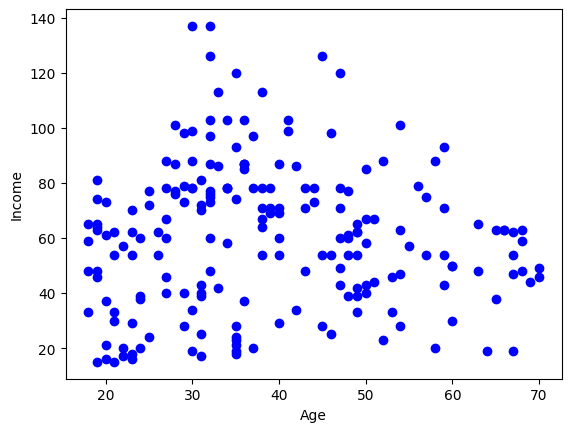

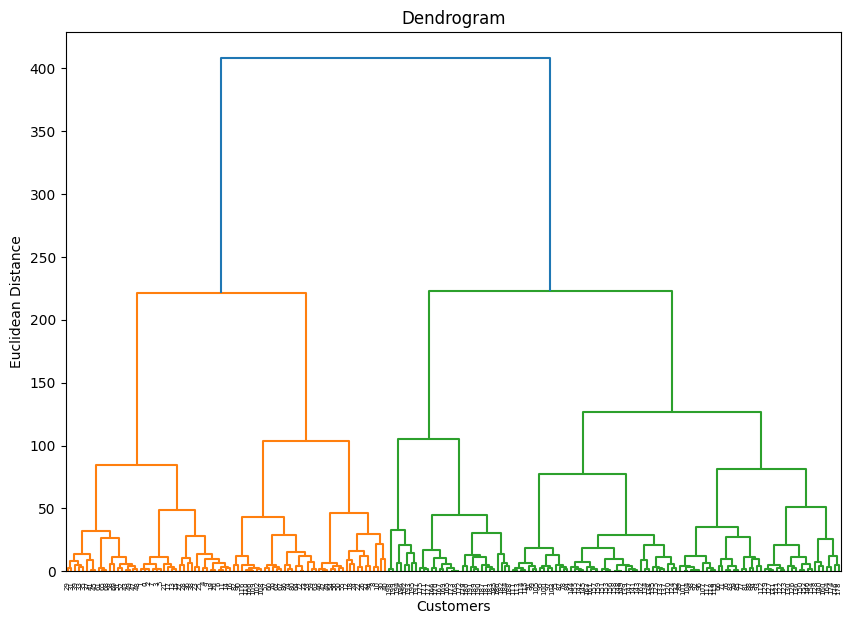

np.float64(0.4104652474372429)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
%matplotlib inline

## Hiearchical Clustering

df = pd.read_csv('Mall_Customers.csv')
df.head(5)

dfsubset = df.loc[:, ["Age", "Annual Income (k$)"]]
plt.xlabel("Age")
plt.ylabel("Income")
plt.scatter(dfsubset[["Age"]], dfsubset[["Annual Income (k$)"]], color='blue')
plt.show()

plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(dfsubset, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit_predict(dfsubset)

c1 = cluster.fit_predict(dfsubset)
silhouette_score(dfsubset, c1)





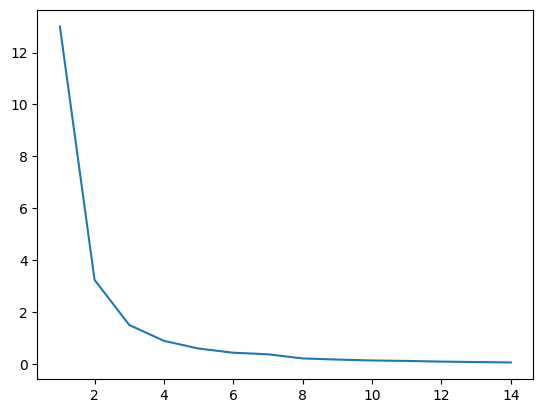

np.float64(0.6171912531942989)

In [3]:
## K-Means Clustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

x = dfsubset.values
norm_x = normalize(x)
df_norm_x = pd.DataFrame(norm_x)
df_norm_x

cluster_score=[]

for k in range(1,15):
  km = KMeans(n_clusters=k)
  km.fit(df_norm_x)
  cluster_score.append(km.inertia_)

plt.plot(range(1,15), cluster_score)
plt.show()

km = KMeans(n_clusters=3)
km.fit(df_norm_x)
c2 = km.predict(df_norm_x)

silhouette_score(df_norm_x, c2)


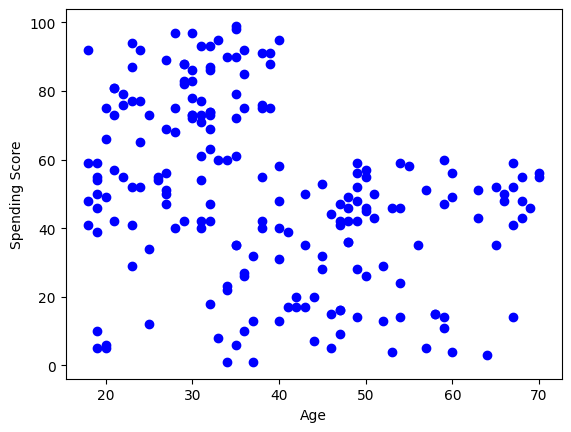

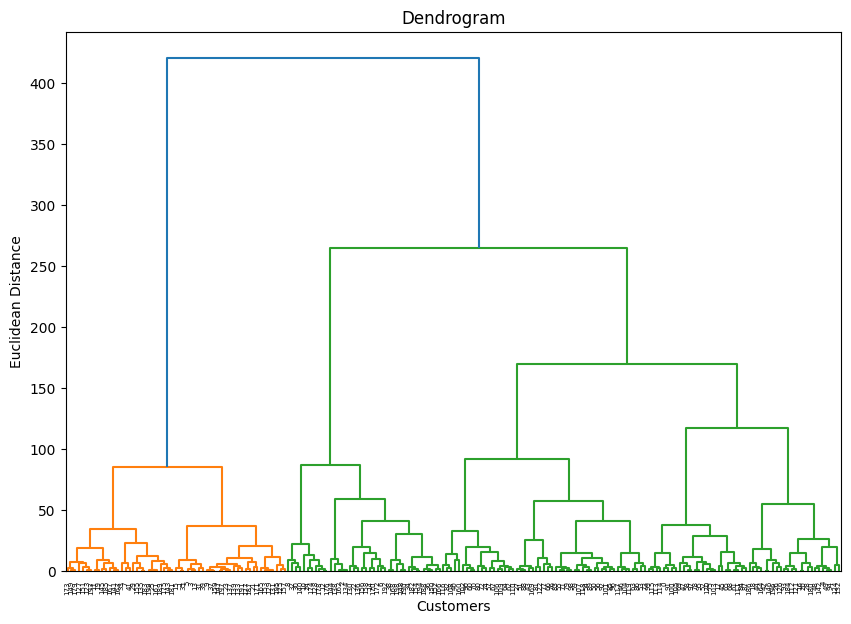

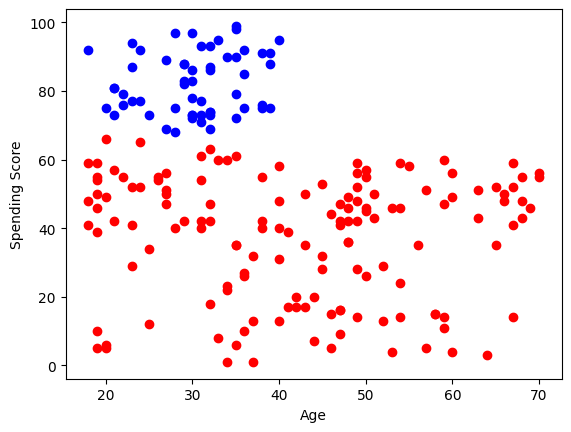

np.float64(0.4549465643222241)

In [5]:
## Now with Columns Age & Spending Score
## Hiearchical Clustering

dfsubset2 = df.loc[:, ["Age", "Spending Score (1-100)"]]
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.scatter(dfsubset2[["Age"]], dfsubset2[["Spending Score (1-100)"]], color='blue')
plt.show()

plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(dfsubset2, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

cluster1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster1.fit_predict(dfsubset2)

x = dfsubset2.values
c3 = cluster1.fit_predict(x)

plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.scatter(x[c3==0,0], x[c3==0, 1], color = 'red')
plt.scatter(x[c3==1,0], x[c3==1, 1], color = 'blue')
plt.show()

c3 = cluster1.fit_predict(x)
silhouette_score(x, c3)



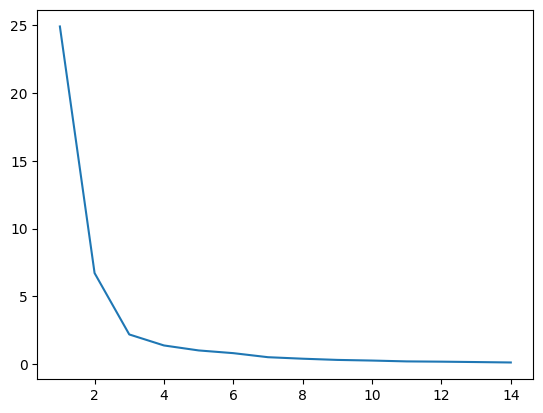

np.float64(0.6845121063469037)

In [9]:
## K-Means Clustering

norm_x1 = normalize(x)
df_norm_x1 = pd.DataFrame(norm_x1)
df_norm_x1

cluster_score=[]

for k in range(1,15):
  km = KMeans(n_clusters=k)
  km.fit(df_norm_x1)
  cluster_score.append(km.inertia_)

plt.plot(range(1,15), cluster_score)
plt.show()

km = KMeans(n_clusters=3)
km.fit(df_norm_x1)
pred = km.predict(df_norm_x1)

silhouette_score(df_norm_x1, pred)



